In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import random
import math
%matplotlib inline
#import elm
#from glm import GLM
from sklearn.preprocessing import normalize





In [2]:
#getting data from the CSV file
dataset = pd.read_csv('D:/JOB, Application STUFF/Fraunhofer/Frauhofer task/Task 2/20200709_Results_Exp_Sim.csv', sep=';', decimal=',')

dataset_Exp = dataset[0:0]
dataset_Sim = dataset[40:60]
dataset.head()

,Nr.1,Nr.2,Konfiguration,Versuch,Bauteil,T_O,delta_t_h,F_p,t_a,d_T_O,...,HV_MP3_sim,HV_MP4_sim,HV_MP5_sim,HV_MP6_sim,HV_MP1_delta_exp_sim,HV_MP2_delta_exp_sim,HV_MP3_delta_exp_sim,HV_MP4_delta_exp_sim,HV_MP5_delta_exp_sim,HV_MP6_delta_exp_sim
0,1,1,1,1,3,930,0,1750,4,-41.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,4,2,1,2,930,0,2000,2,-38.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,7,3,1,1,930,0,2250,6,-38.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,10,4,1,4,930,2,2000,6,-41.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,13,5,1,5,930,4,1750,2,-39.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
class ML_Model:
    def __init__(self, X, y, MP):
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=.2, shuffle= True)
        self.Neg_Root_Mean_Square_Error={}
        self.MP = MP
    def Linear_regression(self):
        regressor = LinearRegression()  
        self.Error= cross_validate(regressor, X, y, cv=5, scoring=('neg_mean_squared_error'))
        self.Neg_Root_Mean_Square_Error.update({'Linear_regression.................':np.sqrt(-self.Error["test_score"])})
        
    def Gaussian_regression(self):
        kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
        gp = GaussianProcessRegressor(kernel=kernel, alpha=9,n_restarts_optimizer=10)
        self.Error= cross_validate(gp, X, y, cv=5, scoring=('neg_mean_squared_error')) 
        self.Neg_Root_Mean_Square_Error.update({'Gaussian_regression...............':np.sqrt(-self.Error["test_score"])})
        
    def SupportVector_regression(self):
        svr_lin = SVR(kernel='linear', C=1, gamma='auto')
        svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
        svr_poly = SVR(kernel='poly', C=100, gamma= 'scale', degree=2, epsilon=.1, coef0=1)
        self.Error = cross_validate(svr_lin, X, y, cv=5, scoring=('neg_mean_squared_error'))
        self.Neg_Root_Mean_Square_Error.update({'SupportVector_regression_lin......':np.sqrt(-self.Error["test_score"])})
        self.Error = cross_validate(svr_rbf, X, y, cv=5, scoring=('neg_mean_squared_error'))
        self.Neg_Root_Mean_Square_Error.update({'SupportVector_regression_rbf......':np.sqrt(-self.Error["test_score"])})
        self.Error = cross_validate(svr_poly, X, y, cv=5, scoring=('neg_mean_squared_error'))
        self.Neg_Root_Mean_Square_Error.update({'SupportVector_regression_poly......':np.sqrt(-self.Error["test_score"])})
    
    def DecisionTree_Regressor(self):
        regr = DecisionTreeRegressor(max_depth=6)
        self.Error = cross_validate(regr, X, y, cv=5, scoring=('neg_mean_squared_error')) 
        self.Neg_Root_Mean_Square_Error.update({'DecisionTree_Regressor............':np.sqrt(-self.Error["test_score"])})
        
    
    def covariance(self):
        print("The covarience matrix is")
        A= np.dot(np.transpose(X),X)
        with np.printoptions(precision=7, suppress=True):
            print(np.linalg.inv(A))
    

        
    #def ELM_(self):
        #dataset = normalize(dataset)
        #dataset.target = [1 if i == 1 else -1 for i in  dataset.target.astype(int)]
        #elm = ELM(hid_num=10).fit(self.X_train, self.y_train)
        #y_pred = elm.predict(self.X_test)
        #self.Neg_Root_Mean_Square_Error.update({'ELM...............................': metrics.Neg_Root_Mean_Square_Error(self.y_test, y_pred)})

        
    
    def Print(self):
        print("The Root Mean Squared Error for",self.MP, "\n")
        for key, value in self.Neg_Root_Mean_Square_Error.items() :
            print (key, value, "\n")
            
    def plot(self):
        fig = plt.figure()
        fig.suptitle('SIM '+self.MP+'.jpeg')
        ax = fig.add_subplot(111)
        plt.ylim(ymin=0, ymax=150)
        plt.boxplot(self.Neg_Root_Mean_Square_Error.values())
        ax.set_xticklabels(['LR','GR','SVR-l','SVR-RBF','SVR-POLY','DTR'])
        plt.xlabel('Chosen Models')
        plt.ylabel('Root Mean Squared Error')
        plt.savefig('D:/JOB, Application STUFF/Fraunhofer/Frauhofer task/Task 2/SIM/SIM '+self.MP+'.jpeg')
        plt.show()
    
    def func_call(self):
        self.Linear_regression()
        self.Gaussian_regression()
        self.SupportVector_regression()
        self.DecisionTree_Regressor()
        self.covariance()
        self.plot()
        self.Print()
       

(20, 3)
(20,)
The covarience matrix is
[[ 0.0000004 -0.0000324 -0.0000648]
 [-0.0000324  0.0147427 -0.0000538]
 [-0.0000648 -0.0000538  0.0154355]]


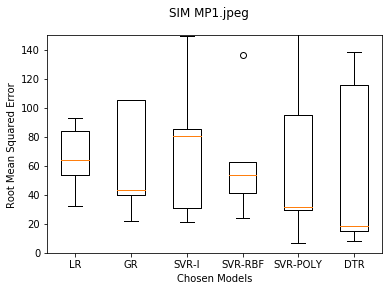

The Root Mean Squared Error for MP1 

Linear_regression................. [53.3718358  84.16347819 64.3037097  92.65636544 32.3284926 ] 

Gaussian_regression............... [105.5128826   43.61893115 471.45510892  39.69219725  22.03855739] 

SupportVector_regression_lin...... [ 85.23239262 149.23657691  80.70597581  30.80040694  20.96211981] 

SupportVector_regression_rbf...... [ 41.39873585 136.63679668  62.72005897  53.94629262  24.25085268] 

SupportVector_regression_poly...... [ 95.25713412 173.2252754   31.28828697  29.25808253   6.83184241] 

DecisionTree_Regressor............ [116.08715614  18.8175442  138.70257406   7.97196473  15.04388714] 

The covarience matrix is
[[ 0.0000004 -0.0000324 -0.0000648]
 [-0.0000324  0.0147427 -0.0000538]
 [-0.0000648 -0.0000538  0.0154355]]


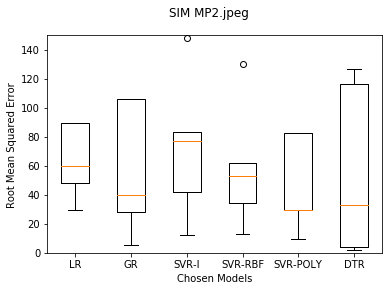

The Root Mean Squared Error for MP2 

Linear_regression................. [48.41679193 89.76715107 60.21442958 89.52935633 29.22180031] 

Gaussian_regression............... [106.13974339  28.10521494 385.41853163  40.19109525   5.18825064] 

SupportVector_regression_lin...... [ 83.50450189 148.13632911  77.12736712  42.03594727  12.49281129] 

SupportVector_regression_rbf...... [ 34.16263946 130.52006707  62.27286182  53.13125358  12.81058313] 

SupportVector_regression_poly...... [ 82.74215283 170.07434563  29.6506924   29.5527417    9.58567267] 

DecisionTree_Regressor............ [116.31557258  32.87724732 126.69960427   2.19758324   4.13361658] 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-3.30416614e+02,  1.74789827e-05]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 54, 'nit': 8, 'warnflag': 2}
  ConvergenceWarning)


The covarience matrix is
[[ 0.0000004 -0.0000324 -0.0000648]
 [-0.0000324  0.0147427 -0.0000538]
 [-0.0000648 -0.0000538  0.0154355]]


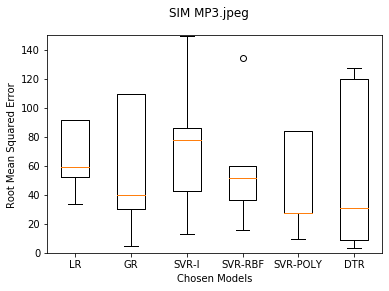

The Root Mean Squared Error for MP3 

Linear_regression................. [51.97661599 91.42322487 59.51797038 91.78443836 33.58972455] 

Gaussian_regression............... [109.58723343  30.14892595 472.05429657  39.91227101   4.51288665] 

SupportVector_regression_lin...... [ 86.10831145 149.70375915  77.83607931  42.91962573  13.00571098] 

SupportVector_regression_rbf...... [ 36.11003858 134.16129338  59.97311974  51.90955739  15.49050588] 

SupportVector_regression_poly...... [ 83.95278439 172.68552205  27.21789923  27.305287     9.33956485] 

DecisionTree_Regressor............ [119.59352741  30.64409312 127.56043657   8.96556252   3.07449107] 

The covarience matrix is
[[ 0.0000004 -0.0000324 -0.0000648]
 [-0.0000324  0.0147427 -0.0000538]
 [-0.0000648 -0.0000538  0.0154355]]


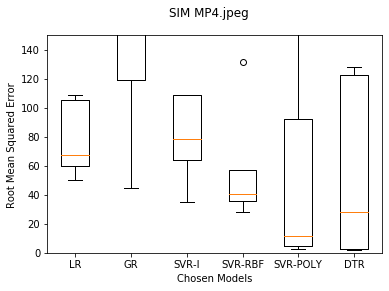

The Root Mean Squared Error for MP4 

Linear_regression................. [ 67.43730652 108.92654217  59.94086559 105.70851128  50.08816304] 

Gaussian_regression............... [119.37777351  44.67168754 471.15817708 245.9459449  233.35099108] 

SupportVector_regression_lin...... [108.62216392 179.15203149  78.54446549  64.14236889  34.97293489] 

SupportVector_regression_rbf...... [ 40.28030884 131.95754349  57.22974615  35.5227617   27.84728297] 

SupportVector_regression_poly...... [ 92.19848132 180.78416186  11.37201965   5.01311707   2.37869415] 

DecisionTree_Regressor............ [122.50749965  28.27103892 128.40516454   2.95904091   2.05098164] 

The covarience matrix is
[[ 0.0000004 -0.0000324 -0.0000648]
 [-0.0000324  0.0147427 -0.0000538]
 [-0.0000648 -0.0000538  0.0154355]]


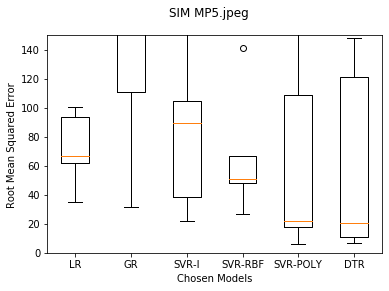

The Root Mean Squared Error for MP5 

Linear_regression................. [ 61.92914004  93.42782107  66.48443309 100.7888793   34.9453347 ] 

Gaussian_regression............... [111.12303706 162.53891153 472.5207251   31.62297236 259.82611024] 

SupportVector_regression_lin...... [104.64829223 175.4795865   89.7191335   38.20825058  22.1314885 ] 

SupportVector_regression_rbf...... [ 48.14767952 141.60931126  67.05358885  51.15875539  27.00448144] 

SupportVector_regression_poly...... [109.04441844 190.86440713  21.60946916  18.07670678   6.34673236] 

DecisionTree_Regressor............ [121.21545354  20.34919332 148.12301381   6.96557126  10.89233249] 

The covarience matrix is
[[ 0.0000004 -0.0000324 -0.0000648]
 [-0.0000324  0.0147427 -0.0000538]
 [-0.0000648 -0.0000538  0.0154355]]


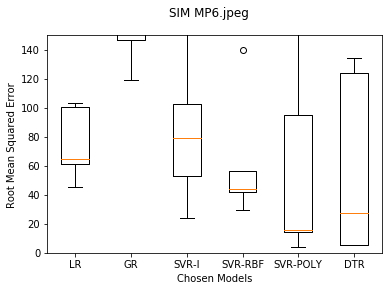

The Root Mean Squared Error for MP6 

Linear_regression................. [ 64.52078786 103.11749183  61.22113911 100.23909387  45.2652847 ] 

Gaussian_regression............... [119.24896241 146.8883539  474.84465842 270.96766761 252.42668482] 

SupportVector_regression_lin...... [102.79610456 167.56107601  79.3813086   52.68400301  23.69994845] 

SupportVector_regression_rbf...... [ 42.03800345 139.66642986  56.46972841  44.32791495  29.47510231] 

SupportVector_regression_poly...... [ 94.80286073 182.1842378   15.45898081  14.40384315   3.77874036] 

DecisionTree_Regressor............ [124.15877842  27.71518879 134.6098941    5.44692968   5.04495088] 

PCA 

Explained variance ratio: 
 [0.97997641 0.01037999 0.0096436 ]
Singular values: 
 [80.00631188  8.23407554  7.93662775]


In [4]:
X_exp = dataset_Exp[['T_O', 'delta_t_h','t_a']].values
X_sim = dataset_Sim[['T_O', 'delta_t_h', 't_a']].values
X = np.concatenate([X_exp, X_sim])
#X = np.transpose(np.array([X[:,0], X[:,1], X[:,2], X[:,1]*X[:,1], X[:,2]*X[:,2] ]))
y = np.concatenate([dataset_Exp['HV_MP1_exp'].values, dataset_Sim['HV_MP1_sim'].values])
print(X.shape)
print(y.shape)
MP1=ML_Model(X,y,'MP1')
MP1.func_call()
            
y = np.concatenate([dataset_Exp['HV_MP2_exp'].values, dataset_Sim['HV_MP2_sim'].values])
MP2=ML_Model(X,y,'MP2')
MP2.func_call()

y = np.concatenate([dataset_Exp['HV_MP3_exp'].values, dataset_Sim['HV_MP3_sim'].values])
MP3=ML_Model(X,y,'MP3')
MP3.func_call()

y = np.concatenate([dataset_Exp['HV_MP4_exp'].values, dataset_Sim['HV_MP4_sim'].values])
MP4=ML_Model(X,y,'MP4')
MP4.func_call()

y = np.concatenate([dataset_Exp['HV_MP5_exp'].values, dataset_Sim['HV_MP5_sim'].values])
MP5=ML_Model(X,y,'MP5')
MP5.func_call()

y = np.concatenate([dataset_Exp['HV_MP6_exp'].values, dataset_Sim['HV_MP6_sim'].values])
MP6=ML_Model(X,y,'MP6')
MP6.func_call()

#PCA
pca = PCA(n_components=3, svd_solver='randomized')
X= pca.fit_transform(X)
print("PCA \n")
print("Explained variance ratio: \n", pca.explained_variance_ratio_)
print("Singular values: \n", pca.singular_values_)
    
#ELM
#https://towardsdatascience.com/build-an-extreme-learning-machine-in-python-91d1e8958599
#https://github.com/masaponto/Python-ELM


#GLM
#https://towardsdatascience.com/generalized-linear-models-9cbf848bb8ab            


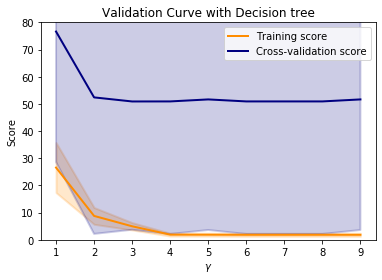

In [5]:
X_exp = dataset_Exp[['T_O', 'delta_t_h','t_a']].values
X_sim = dataset_Sim[['T_O', 'delta_t_h', 't_a']].values
X = np.concatenate([X_exp, X_sim])
#X = np.transpose(np.array([X[:,0], X[:,1], X[:,2], X[:,1]*X[:,1], X[:,2]*X[:,2] ]))
y = np.concatenate([dataset_Exp['HV_MP2_exp'].values, dataset_Sim['HV_MP2_sim'].values])
#svr_poly = SVR(kernel='poly', C=100, gamma= 'scale', degree=2, epsilon=.1, coef0=1)

train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y,'max_depth',[x for x in range(1,10)],cv=5, scoring='neg_mean_absolute_error')
#train_scores, test_scores = validation_curve(SVR(), X, y,'degree',[x for x in range(1,5)],cv=5, scoring='neg_mean_absolute_error')

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = -np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = -np.std(test_scores, axis=1)

plt.title("Validation Curve with Decision tree")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 80)
plt.plot([x for x in range(1,10)], train_scores_mean, label="Training score",color="darkorange", lw=2)
plt.fill_between([x for x in range(1,10)], train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=2)
plt.plot([x for x in range(1,10)], test_scores_mean, label="Cross-validation score",color="navy", lw=2)
plt.fill_between([x for x in range(1,10)], test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('D:/JOB, Application STUFF/Fraunhofer/Frauhofer task/Task 2/SIM/Validation Curve Decision tree.jpeg')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:1360: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 12 instead of 20).
  % (train_sizes_abs.shape[0], n_ticks), RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\

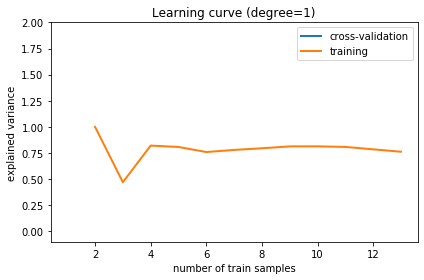

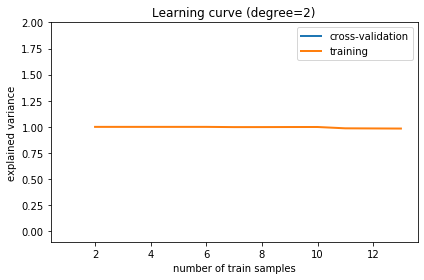

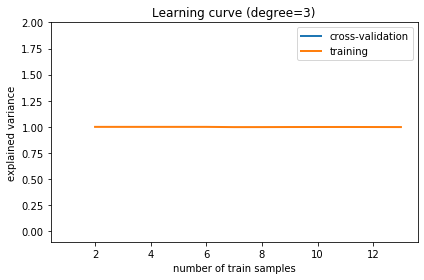

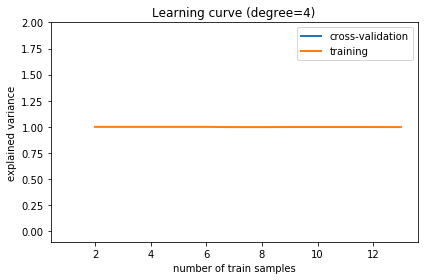

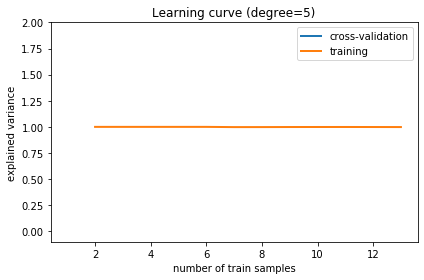

In [21]:
# A learning curve for d=1,2,3,4,5
for d in [1,2,3,4,5]:
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())

    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, validation_scores = learning_curve(model, X, y,train_sizes=(np.logspace(-1, 0, 20)))
    # Plot the mean train error and validation error across folds
    plt.figure(figsize=(6, 4))
    plt.plot(train_sizes, validation_scores.mean(axis=1),lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1),lw=2, label='training')
    plt.ylim(ymin=-.1, ymax=2)

    plt.legend(loc='best')
    plt.xlabel('number of train samples')
    plt.ylabel('explained variance')
    plt.title('Learning curve (degree=%i)' % d)
    plt.tight_layout()
    plt.savefig(f'D:/JOB, Application STUFF/Fraunhofer/Frauhofer task/Task 2/SIM/Learning Curve Lenear Regression {d}.jpeg')    
plt.show()